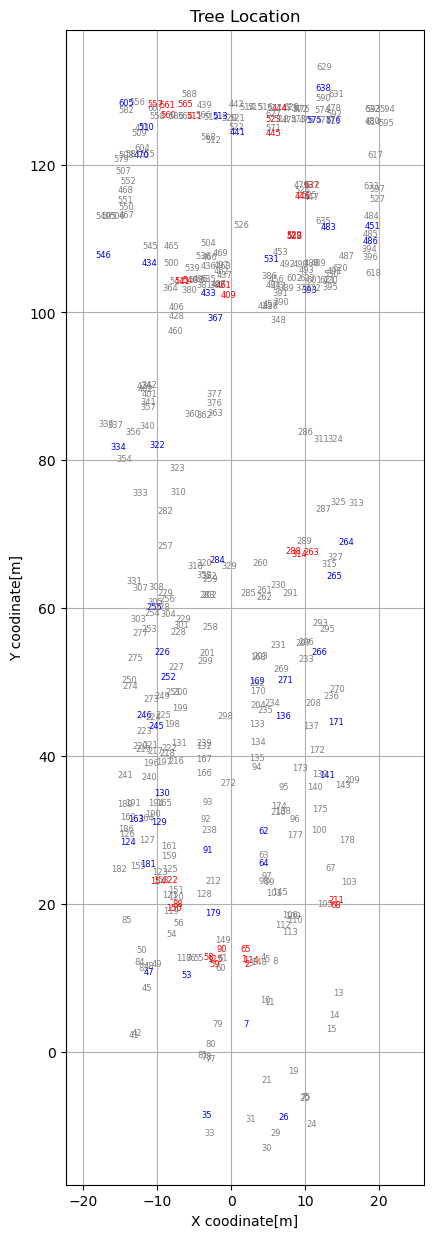

In [22]:
import pandas as pd
# CSVファイルを再読み込み
trees_data_new = pd.read_csv('tree_list.csv', encoding='shift_jis')

# (1) 指定された条件に基づく立木のIDを再抽出
filtered_trees_new = trees_data_new[
    (trees_data_new['2cm括約胸高直径[cm]'] >= 30) & 
    (trees_data_new['2cm括約胸高直径[cm]'] <= 50) & 
    (trees_data_new['樹高[m]'] >= 5)
]

filtered_ids_new = filtered_trees_new['ID'].tolist()
filtered_ids_new

from scipy.spatial import distance

# (2) 指定された条件に該当する立木同士の距離が2m以内のものをフラグ付け
coords_filtered_new = filtered_trees_new[['X座標[m]', 'Y座標[m]']].values
close_tree_ids_new = {}

for idx, coords in enumerate(coords_filtered_new):
    for j, other_coords in enumerate(coords_filtered_new):
        # 同じ立木を比較しないようにする
        if idx != j:
            dist = distance.euclidean(coords, other_coords)
            if dist <= 2:
                close_tree_ids_new[filtered_ids_new[idx]] = True

close_tree_ids_new

import matplotlib.pyplot as plt

# 全ての立木の座標とIDを取得
x_coords_all_new = trees_data_new['X座標[m]'].tolist()
y_coords_all_new = trees_data_new['Y座標[m]'].tolist()
labels_all_new = trees_data_new['ID'].tolist()

plt.figure(figsize=(5, 15))

# 各立木のIDをプロット
for x, y, label in zip(y_coords_all_new, x_coords_all_new, labels_all_new):
    if label in close_tree_ids_new:
        plt.text(x, y, str(label), fontsize=6, ha='center', va='center', color='red')
    elif label in filtered_ids_new:
        plt.text(x, y, str(label), fontsize=6, ha='center', va='center', color='blue')
    else:
        plt.text(x, y, str(label), fontsize=6, ha='center', va='center', color='gray')

plt.xlabel('X coodinate[m]')
plt.ylabel('Y coodinate[m]')
plt.title('Tree Location')
plt.grid(True)

# X座標とY座標の最小値と最大値を取得
x_min_new, x_max_new = min(y_coords_all_new), max(y_coords_all_new)
y_min_new, y_max_new = min(x_coords_all_new), max(x_coords_all_new)

x_min_new, x_max_new, y_min_new, y_max_new

# 表示範囲を制限
plt.xlim(x_min_new-5, x_max_new+5)
plt.ylim(y_min_new-5, y_max_new+5)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()